<a href="https://colab.research.google.com/github/csabi0312/GlobOpt2/blob/main/GlobOpt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing packages

In [1]:
import matplotlib.pyplot as plt
from scipy import optimize
import numpy as np
%matplotlib inline

In [2]:
pip install rich

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 237 kB 5.1 MB/s 
     |████████████████████████████████| 51 kB 6.7 MB/s 


In [3]:
from rich.progress import track

# Simulated annealing TSP

In [4]:
def anneal(cities,nsteps=20000000,precision=0.1,max_iter=5000,T=1.0):
  """
  params:
  - cities: list of lists, 
  -
  -
  """
  num_cit=len(cities)
  A=np.zeros(shape=(num_cit,num_cit))
  route=list(np.arange(0,num_cit,1))
  

  for i in range(num_cit):
    for j in range(num_cit):
      A[i][j]=(np.sum((cities[i]-cities[j])**2))**0.5

  def distance(rt):
    szum=0
    for k in range(num_cit-1):
      szum+=A[rt[k]][rt[k+1]]
    szum+=A[rt[-1]][rt[0]]
    return szum

  dist=[]


  for l in range(nsteps):
    arr=np.random.choice(num_cit,size=2,replace=False)
    arr.sort()
    i=arr[0]
    j=arr[1]
    new_route=[]
    new_route2=[]

    dist.append(distance(route))

    if np.abs(i-j)<=1:
      continue

    elif j==(num_cit-1) and i==0:
      continue

    elif j==(num_cit-1) and i!=0:
      new_route=[route[j]] + list(np.flip(route[0:i+1])) + route[i+1:j]

    elif j-i>1:
      new_route=route[:i+1]+list(np.flip(route[i+1:j+1]))+route[j+1:]

    if distance(new_route)<distance(route):
      route=list(np.copy(new_route))

    elif distance(new_route)>=distance(route):
      p = np.exp(-(distance(new_route)-distance(route)) / T)
      if np.random.uniform()<p:
        route=list(np.copy(new_route))
      T=0.99995*T

    if l>max_iter:
      if np.abs(dist[-max_iter]-dist[-1])<=precision:
        break


  cit_last=[]
  for i in range(len(route)):
    cit_last.append(list(cities[route[i]]))

  return  np.array(cit_last),dist

# Teszt egy példán

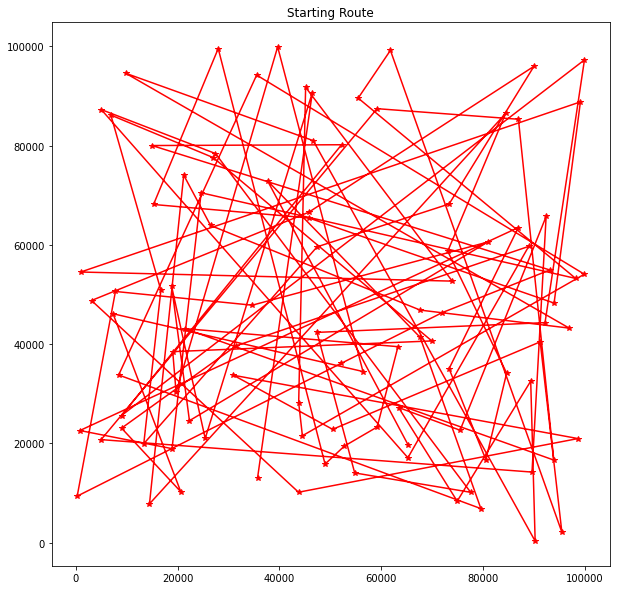

In [11]:
plt.rcParams["figure.figsize"] = (10,10)
num_cities=100
cities=np.random.choice(100000,size=(num_cities,2),replace=False)
plt.plot(cities[:,0],cities[:,1],"r*-")
plt.title("Starting Route")
plt.show()

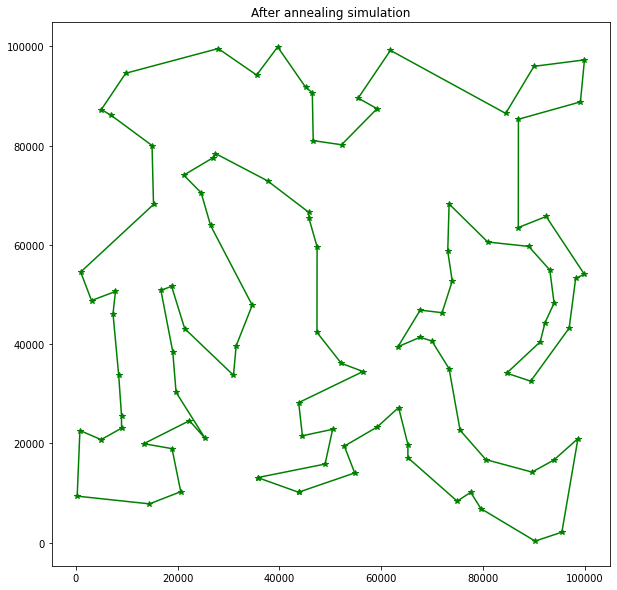

In [15]:
plt.rcParams["figure.figsize"] = (10,10)
cities2,dist=anneal(cities=cities)
plt.plot(cities2[:,0],cities2[:,1],"g*-")
plt.plot(cities2[[0,-1],0],cities2[[0, -1],1],"g*-")
plt.title("After annealing simulation")
plt.show()

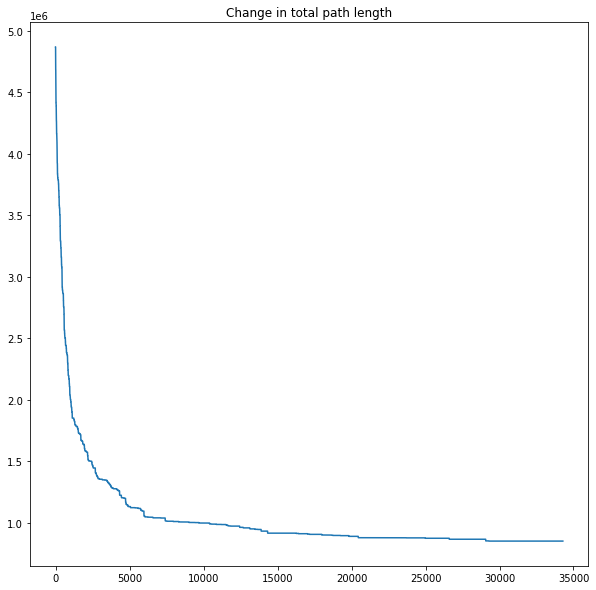

In [16]:
plt.plot(np.arange(0,len(dist),1),dist)
plt.title("Change in total path length")
plt.show()

# Donát

Output()

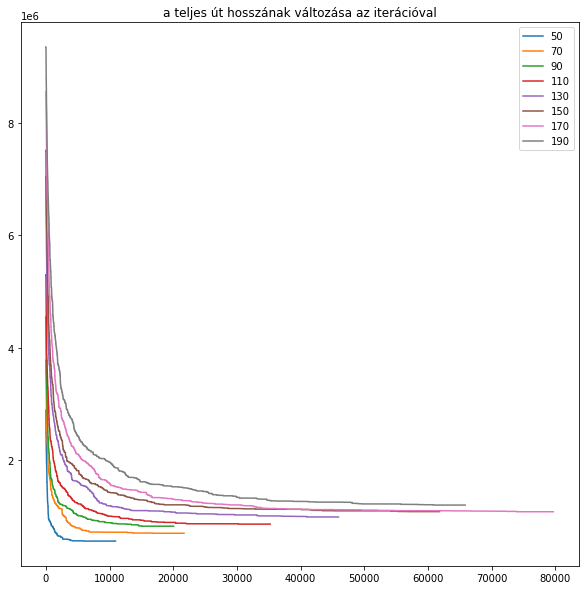

In [ ]:
for num_cities in track(np.arange(50,200,20),description="Process"):
  cities=np.random.choice(100000,size=(num_cities,2),replace=False)
  cities2,dist=anneal(cities=cities)
  plt.plot(np.arange(0,len(dist),1),dist,label=str(num_cities))
  plt.title("a teljes út hosszának változása az iterációval")
plt.legend()
plt.show()

# Trying out on Hungarian cities

In [ ]:
%%capture
!pip install pyshp

In [ ]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set(style='whitegrid', palette='pastel', color_codes=True) 
sns.mpl.rc('figure', figsize=(10,6))

In [ ]:
sf = shp.Reader('/content/hu_100km.shp')

In [ ]:
dbf = shp.Reader('/content/hu_100km.dbf')

In [ ]:
len(dbf.shapes())

23

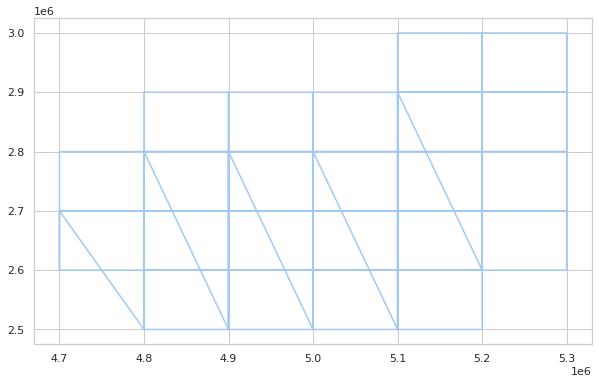

In [ ]:
listx=[]
listy=[]
for sr in dbf.shapeRecords():
    for xNew,yNew in sr.shape.points:
        listx.append(xNew)
        listy.append(yNew)
plt.plot(listx,listy)
plt.show()

In [ ]:
sf.shapeRecords()

ShapefileException: ignored

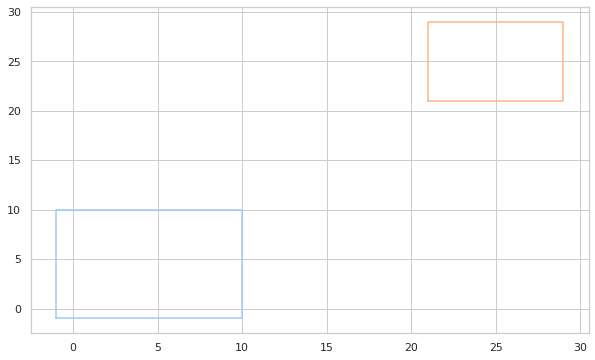

In [ ]:
import numpy as np
from matplotlib import pyplot as p  #contains both numpy and pyplot
x1 = [-1,-1,10,10,-1]; y1 = [-1,10,10,-1,-1]
x2 = [21,21,29,29,21]; y2 = [21,29,29,21,21]
shapes = [[x1,y1],[x2,y2]]
for shape in shapes:
  x,y = shape
  p.plot(x,y)
p.show()